In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# # Cell 3: Designing and Implementing the Frequency Mixer

# # --- Step 1: Load and Prepare Images ---
# try:
#     img_cat_pil = Image.open('/content/drive/My Drive/EE200/Question1/cat_gray.jpg').convert('L')

#     # Standardize sizes by resizing the cat image to match the dog image
#     img_cat_pil = img_cat_pil.resize(img_dog_pil.size)

#     # Convert images to float for calculations
#     img_dog = np.array(img_dog_pil, dtype=float)
#     img_cat = np.array(img_cat_pil, dtype=float)

# except FileNotFoundError:
#     print("Error: 'cat.jpg' not found. Please ensure the image is in the correct directory.")
#     img_cat = np.random.rand(*img_dog.shape) * 255


# # --- Step 2: Design Filters ---
# M, N = img_dog.shape

# # Create a frequency grid that matches the layout of np.fft.fft2 output
# # This is a robust method that avoids shifting errors during calculation.
# x_freq = np.fft.fftfreq(N)
# y_freq = np.fft.fftfreq(M)
# xv, yv = np.meshgrid(x_freq, y_freq)
# D = np.sqrt(xv**2 + yv**2)

# # Define multiple cutoff frequency pairs for low-pass and high-pass filters
# low_pass_cutoffs = [5, 35, 25]  # Example low-pass cutoffs
# high_pass_cutoffs = [10, 13, 3] # Example high-pass cutoffs


# # --- Step 3: Apply Filters and Mix Images ---

# # Get the 2D FFT of both images
# fft_dog = np.fft.fft2(img_dog)
# fft_cat = np.fft.fft2(img_cat)

# # Initialize filtered images
# img_cat_low_total = np.zeros_like(img_cat)
# img_dog_high_total = np.zeros_like(img_dog)


# # Apply multiple low-pass filters to the cat image and sum the results
# for cutoff_low in low_pass_cutoffs:
#     H_lp = np.exp(-(D**2) / (2 * (cutoff_low/N)**2))
#     low_pass_filtered_fft = fft_cat * H_lp
#     img_cat_low = np.real(np.fft.ifft2(low_pass_filtered_fft))
#     img_cat_low_total += img_cat_low

# # Apply multiple high-pass filters to the dog image and sum the results
# for cutoff_high in high_pass_cutoffs:
#     H_hp = 1 - np.exp(-(D**2) / (2 * (cutoff_high/N)**2))
#     high_pass_filtered_fft = fft_dog * H_hp
#     img_dog_high = np.real(np.fft.ifft2(high_pass_filtered_fft))
#     img_dog_high_total += img_dog_high

# # Combine the low-frequency cat components with the high-frequency dog components.
# # Normalize the combined images by the number of filters applied to each.
# hybrid_image = np.clip((img_cat_low_total / len(low_pass_cutoffs)) + (img_dog_high_total / len(high_pass_cutoffs)), 0, 255)


# # --- Step 4: Visualization of the Entire Process ---
# plt.figure(figsize=(10, 10))

# # Plot Hybrid Image
# plt.imshow(hybrid_image, cmap='gray')
# plt.title(f'Hybrid Image (Multiple LP and HP Filters)')
# plt.axis('off')


# plt.suptitle('Frequency Mixer System for Hybrid Image Creation with Multiple LP and HP Filters', fontsize=16)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()

In [12]:
from PIL import Image
import numpy as np

# Load the image
img_cat_pil = Image.open('/content/drive/My Drive/EE200/Question1/cat_gray.jpg').convert('L')


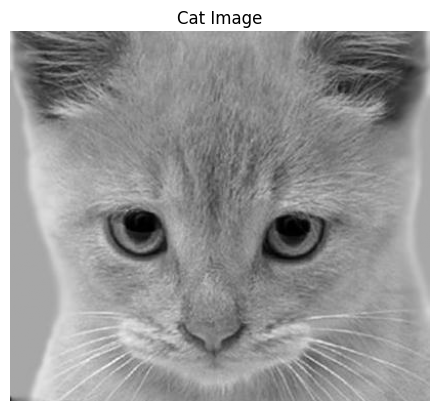

In [15]:
# Convert to array if needed
img_array = np.array(img_cat_pil)

# Display image
plt.imshow(img_cat_pil, cmap='gray')  # Show in grayscale
plt.axis('off')                     # Hide axes
plt.title("Cat Image")
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plotdft(dft_complex, title):
    # Compute magnitude spectrum from complex DFT (unshifted)
    magnitude_spectrum = np.abs(dft_complex)

    # Convert to decibels (for better visibility of low-magnitude components)
    db_spectrum = 20 * np.log10(magnitude_spectrum + 1)  # Add 1 to avoid log(0)

    # Plot the results
    fig = plt.figure(figsize=(12, 12))

    # Display linear magnitude spectrum (no fftshift applied)
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.imshow(magnitude_spectrum, cmap='gray')
    ax1.set_title(f'{title} - Magnitude Spectrum (Unshifted)')
    ax1.axis('off')

    # Display dB (logarithmic) spectrum
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.imshow(db_spectrum, cmap='gray')
    ax2.set_title(f'{title} - dB Spectrum (Unshifted)')
    ax2.axis('off')

    # Render the layout
    plt.tight_layout()
    plt.show()


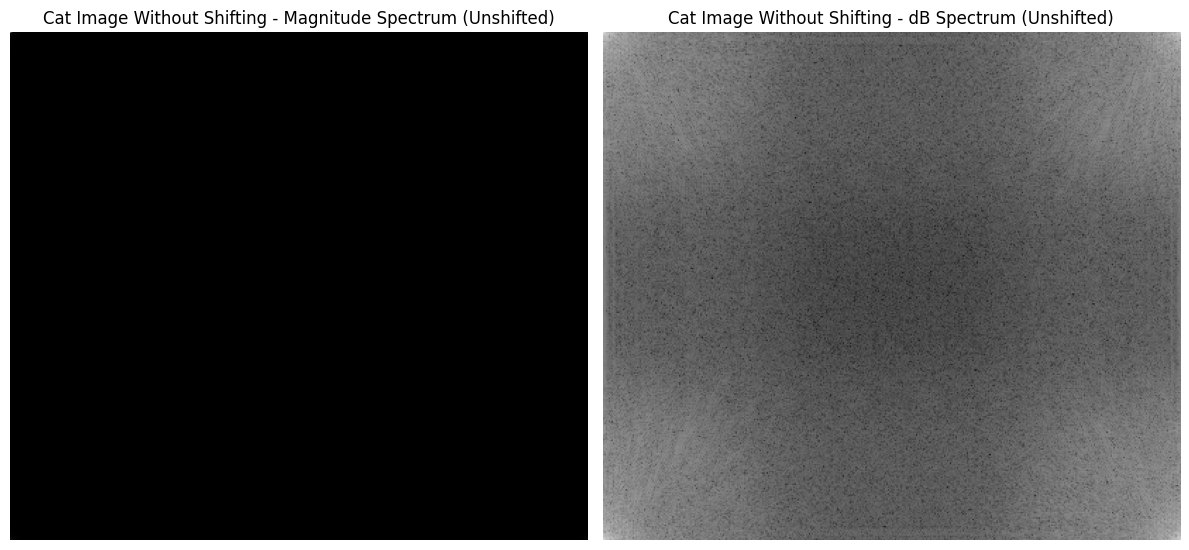

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image using PIL and convert it to grayscale (if not already)
cat_img_pil = Image.open('/content/drive/MyDrive/EE200/Question1/cat_gray.jpg')

# Step 2: Ensure it's a single-channel grayscale image
if cat_img_pil.mode != 'L':
    cat_img_pil = cat_img_pil.convert('L')  # 'L' mode = 8-bit grayscale

# Step 3: Convert PIL image to NumPy array for processing
cat_img_array = np.array(cat_img_pil, dtype=np.float32)

# Step 4: Compute the 2D Discrete Fourier Transform (DFT) using NumPy
# This returns a complex-valued array (real + imaginary parts)
dft = np.fft.fft2(cat_img_array)

# Step 5: Visualize the unshifted DFT spectrum
def plotdft(dft_complex, title):
    # Compute magnitude (i.e., sqrt(Re² + Im²)) from the complex DFT
    magnitude = np.abs(dft_complex)

    # Convert to decibel scale for better contrast visualization
    db_spectrum = 20 * np.log10(magnitude + 1)  # +1 avoids log(0)

    # Plot the results
    fig = plt.figure(figsize=(12, 6))

    # Linear magnitude plot (default top-left DC component)
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(magnitude, cmap='gray')
    ax1.set_title(f'{title} - Magnitude Spectrum (Unshifted)')
    ax1.axis('off')

    # Log-scaled magnitude plot in dB
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(db_spectrum, cmap='gray')
    ax2.set_title(f'{title} - dB Spectrum (Unshifted)')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

# Step 6: Call the function to display both magnitude and dB views
plotdft(dft, "Cat Image Without Shifting")

# Note:
# This spectrum is unshifted — meaning the DC (low frequency) component is at the top-left corner.


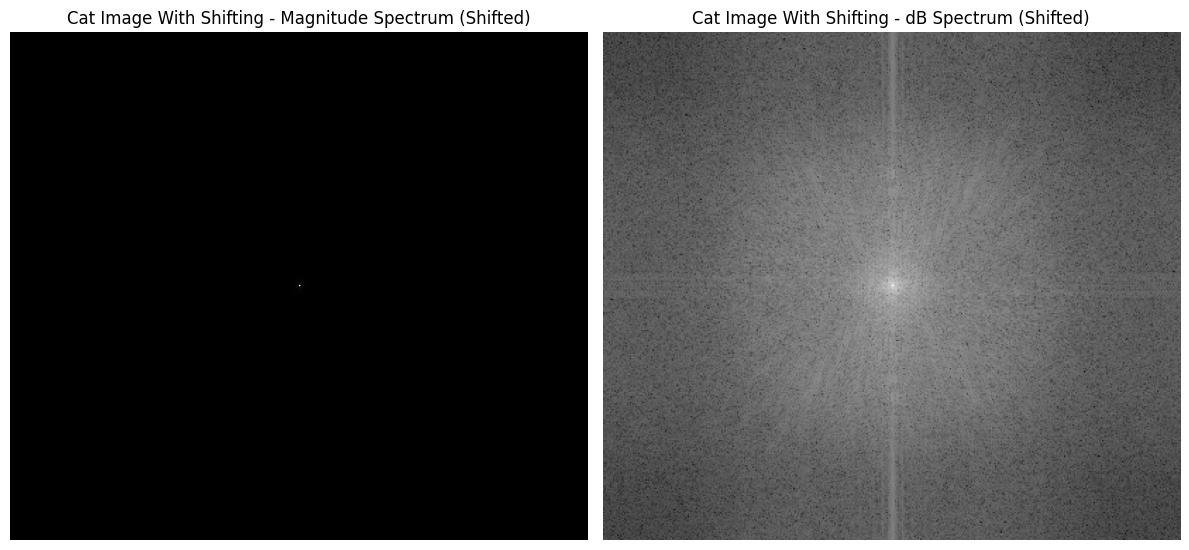

In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and convert the image to grayscale if needed
cat_img_pil = Image.open('/content/drive/MyDrive/EE200/Question1/cat_gray.jpg')
if cat_img_pil.mode != 'L':
    cat_img_pil = cat_img_pil.convert('L')  # Convert to 8-bit grayscale

# Step 2: Convert image to NumPy array
cat_img_array = np.array(cat_img_pil, dtype=np.float32)

# Step 3: Compute the 2D DFT using NumPy (complex result)
dft = np.fft.fft2(cat_img_array)

# Step 4: Shift the zero-frequency (DC) component to the center
dft_shifted = np.fft.fftshift(dft)

# Step 5: Function to display both magnitude and dB spectrum
def plotdft(dft_complex, title):
    # Compute magnitude from complex DFT
    magnitude = np.abs(dft_complex)

    # Compute dB (log-scaled) spectrum for better visibility
    db_spectrum = 20 * np.log10(magnitude + 1)

    # Plotting
    fig = plt.figure(figsize=(12, 6))

    # Plot: Linear magnitude
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(magnitude, cmap='gray')
    ax1.set_title(f'{title} - Magnitude Spectrum (Shifted)')
    ax1.axis('off')

    # Plot: Log-magnitude (dB)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(db_spectrum, cmap='gray')
    ax2.set_title(f'{title} - dB Spectrum (Shifted)')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

# Step 6: Display the centered spectrum
plotdft(dft_shifted, "Cat Image With Shifting")

# Note:
# After applying fftshift, the DC (zero frequency) component appears at the center,
# making it easier to observe low- and high-frequency patterns visually.


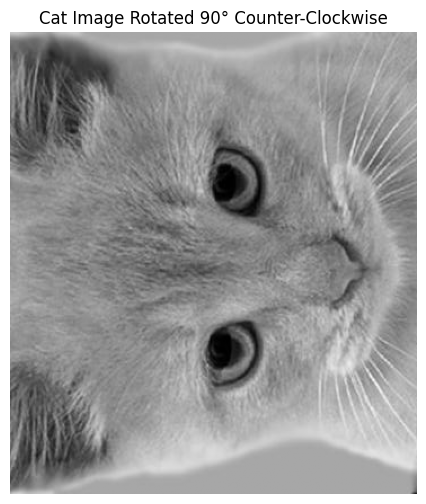

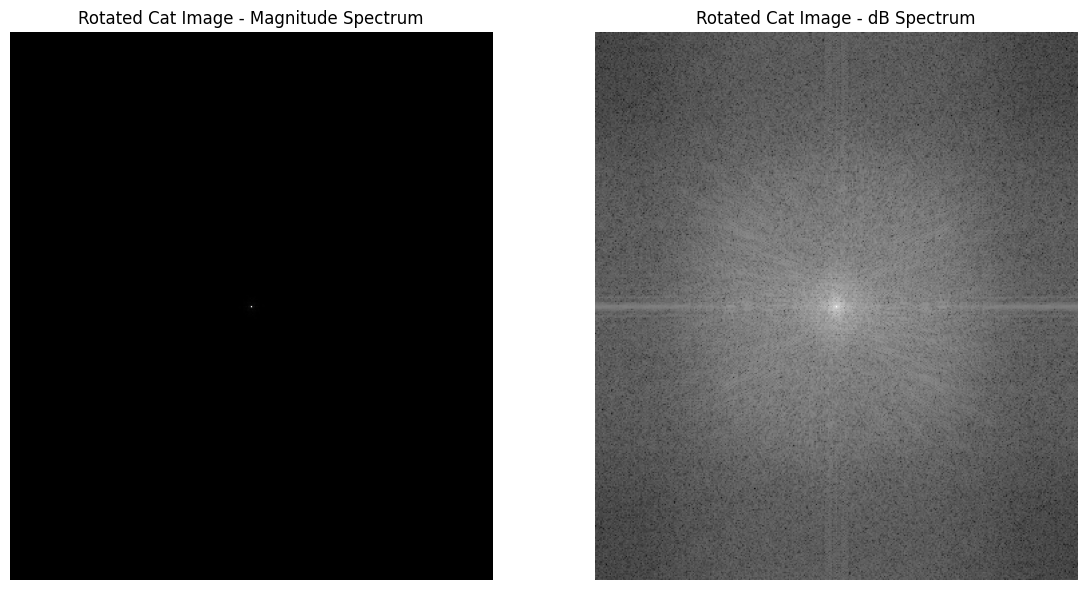

In [20]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image and ensure it's grayscale
cat_img_pil = Image.open('/content/drive/MyDrive/EE200/Question1/cat_gray.jpg')
if cat_img_pil.mode != 'L':
    cat_img_pil = cat_img_pil.convert('L')  # Ensure grayscale

# Step 2: Convert image to NumPy array for processing
cat_img_array = np.array(cat_img_pil, dtype=np.float32)

# Step 3: Rotate the image 90° counter-clockwise using NumPy
cat_img_rotated = np.rot90(cat_img_array, k=1)  # k=1 = 90° anticlockwise

# Step 4: Display the rotated image
plt.figure(figsize=(6, 6))
plt.imshow(cat_img_rotated, cmap='gray')
plt.title("Cat Image Rotated 90° Counter-Clockwise")
plt.axis('off')
plt.show()

# Step 5: Compute the 2D DFT of the rotated image
dft_rotated = np.fft.fft2(cat_img_rotated)
dft_rotated_shifted = np.fft.fftshift(dft_rotated)

# Step 6: Define function to plot magnitude and dB spectra
def plotdft(dft_complex, title):
    magnitude = np.abs(dft_complex)
    db_spectrum = 20 * np.log10(magnitude + 1)  # avoid log(0)

    fig = plt.figure(figsize=(12, 6))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(magnitude, cmap='gray')
    ax1.set_title(f'{title} - Magnitude Spectrum')
    ax1.axis('off')

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(db_spectrum, cmap='gray')
    ax2.set_title(f'{title} - dB Spectrum')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

# Step 7: Plot the spectrum of the rotated image
plotdft(dft_rotated_shifted, "Rotated Cat Image")

# Summary Comment:
# → This code performs a 90° counter-clockwise rotation on the grayscale cat image,
# → Then computes and visualizes its 2D Fourier Transform (magnitude and dB) with frequency centering.


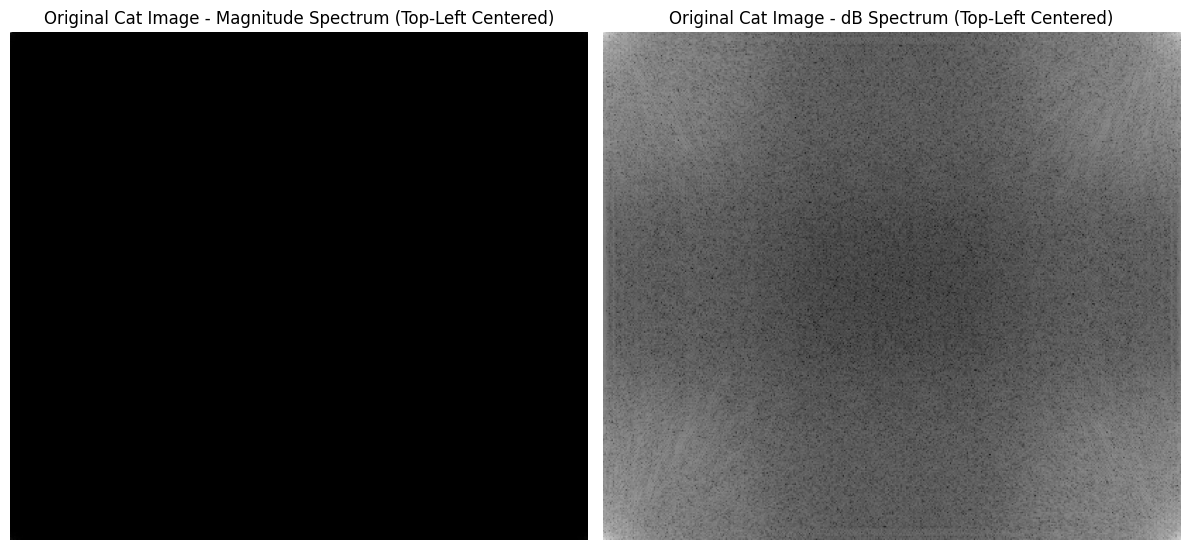

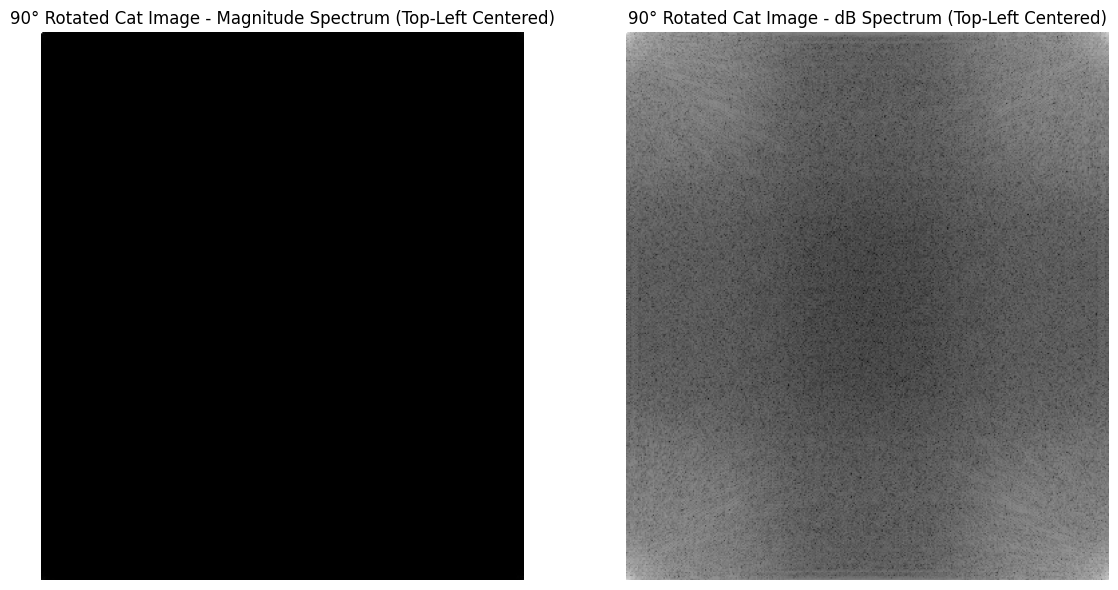

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the original grayscale image using PIL
cat_img_pil = Image.open('/content/drive/MyDrive/EE200/Question1/cat_gray.jpg')
if cat_img_pil.mode != 'L':
    cat_img_pil = cat_img_pil.convert('L')  # Ensure it's grayscale

# Step 2: Convert to NumPy array for processing
cat_img_array = np.array(cat_img_pil, dtype=np.float32)

# Step 3: Rotate the image 90° counter-clockwise using NumPy
cat_img_rot90_array = np.rot90(cat_img_array, k=1)

# Step 4: Compute unshifted DFTs for both original and rotated images
dft_original = np.fft.fft2(cat_img_array)
dft_rot90 = np.fft.fft2(cat_img_rot90_array)

# Step 5: Function to plot magnitude and dB spectrum without shifting
def plotdft(dft_complex, title):
    magnitude = np.abs(dft_complex)
    db_spectrum = 20 * np.log10(magnitude + 1)  # +1 prevents log(0)

    fig = plt.figure(figsize=(12, 6))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(magnitude, cmap='gray')
    ax1.set_title(f'{title} - Magnitude Spectrum (Top-Left Centered)')
    ax1.axis('off')

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(db_spectrum, cmap='gray')
    ax2.set_title(f'{title} - dB Spectrum (Top-Left Centered)')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

# Step 6: Plot both DFTs (without fftshift, so DC is at top-left)
plotdft(dft_original, 'Original Cat Image')
plotdft(dft_rot90, '90° Rotated Cat Image')

# Final Note:
# → Both spectra are unshifted, meaning the DC component (low frequency) is at the top-left corner.
# → Rotation of the image induces an identical rotation in the magnitude spectrum.


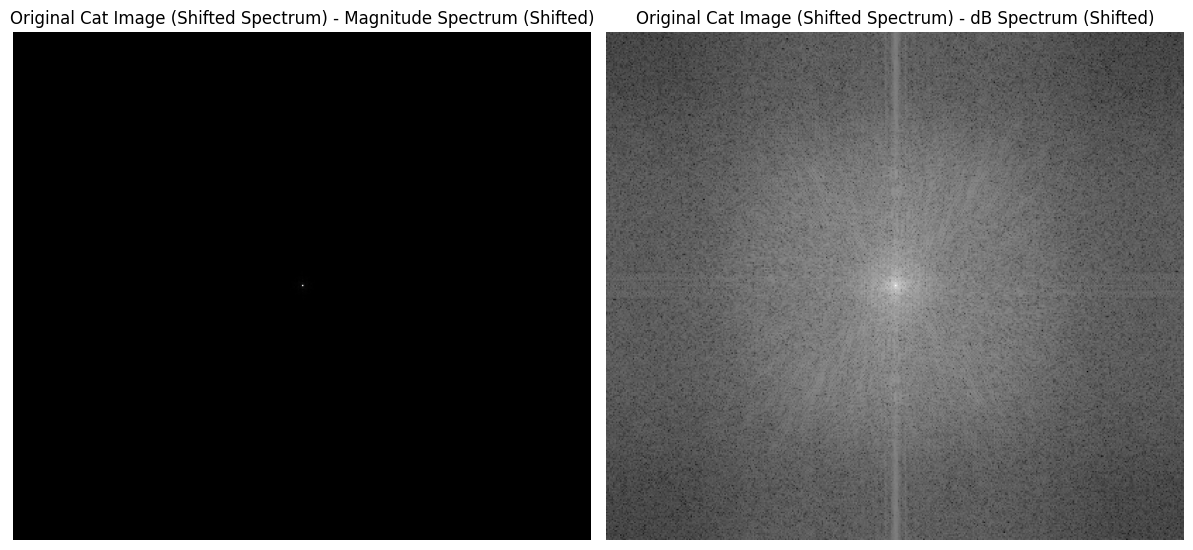

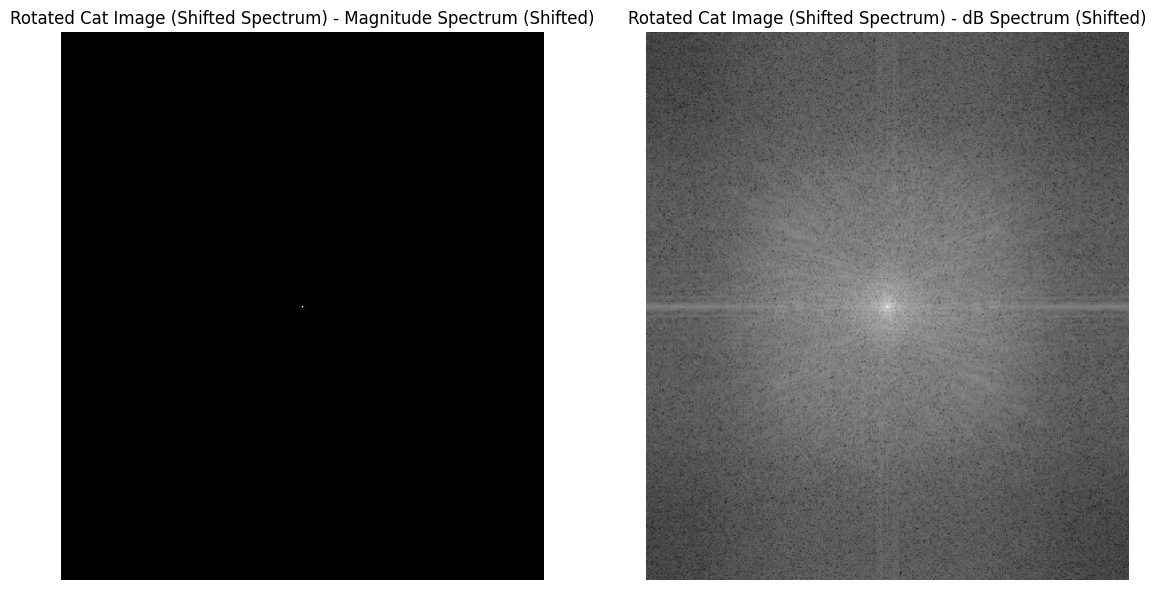

In [22]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load grayscale cat image using PIL
cat_img_pil = Image.open('/content/drive/MyDrive/EE200/Question1/cat_gray.jpg')
if cat_img_pil.mode != 'L':
    cat_img_pil = cat_img_pil.convert('L')  # Convert to 8-bit grayscale

# Step 2: Convert to NumPy array for FFT processing
cat_img_array = np.array(cat_img_pil, dtype=np.float32)

# Step 3: Rotate the image 90° counter-clockwise using NumPy
cat_img_rot90_array = np.rot90(cat_img_array, k=1)

# Step 4: Compute 2D DFT for both images
dft_original = np.fft.fft2(cat_img_array)
dft_rot90 = np.fft.fft2(cat_img_rot90_array)

# Step 5: Shift both DFTs to center the low-frequency components
dft_original_shifted = np.fft.fftshift(dft_original)
dft_rot90_shifted = np.fft.fftshift(dft_rot90)

# Step 6: Define plotting function for magnitude and dB spectrum
def plotdft(dft_complex, title):
    magnitude = np.abs(dft_complex)
    db_spectrum = 20 * np.log10(magnitude + 1)

    fig = plt.figure(figsize=(12, 6))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(magnitude, cmap='gray')
    ax1.set_title(f'{title} - Magnitude Spectrum (Shifted)')
    ax1.axis('off')

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.imshow(db_spectrum, cmap='gray')
    ax2.set_title(f'{title} - dB Spectrum (Shifted)')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

# Step 7: Plot both shifted DFTs
plotdft(dft_original_shifted, 'Original Cat Image (Shifted Spectrum)')
plotdft(dft_rot90_shifted, 'Rotated Cat Image (Shifted Spectrum)')

# Final Comment:
# → From the above plots, it is visually clear that rotating the image by 90° counter-clockwise
# → results in a Fourier magnitude spectrum that is also rotated by the same amount.


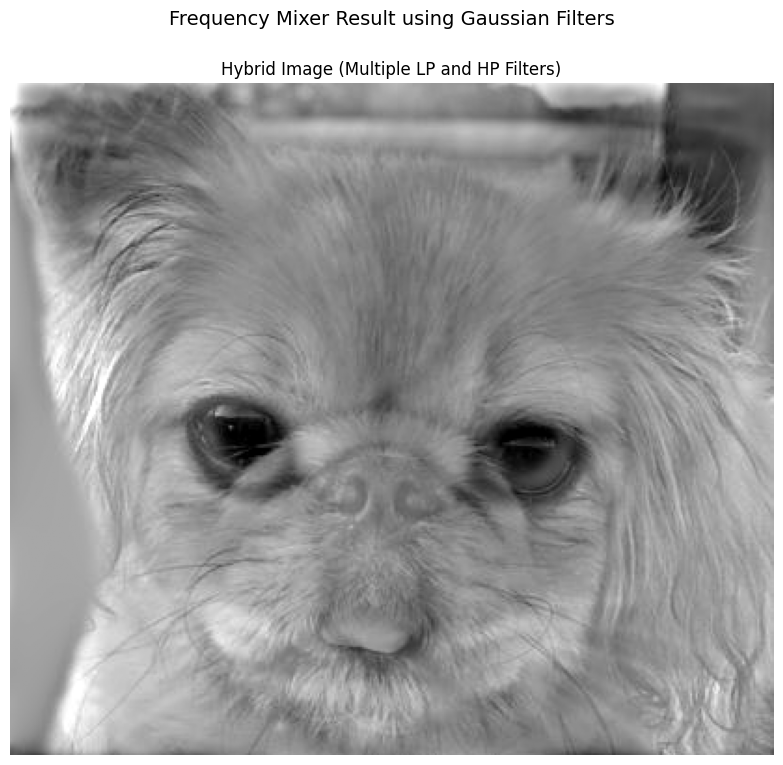

In [24]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Load and Resize Grayscale Images using PIL ---

# Load dog image and convert to grayscale
dog_img_pil = Image.open('/content/drive/MyDrive/EE200/Question1/dog_gray.jpg').convert('L')

# Load cat image and convert to grayscale
cat_img_pil = Image.open('/content/drive/MyDrive/EE200/Question1/cat_gray.jpg').convert('L')

# Resize cat to match dog image dimensions
dog_size = dog_img_pil.size  # (width, height)
cat_img_pil_resized = cat_img_pil.resize(dog_size)

# Convert both images to NumPy float arrays
img_dog = np.array(dog_img_pil, dtype=np.float32)
img_cat = np.array(cat_img_pil_resized, dtype=np.float32)

# --- Step 2: Prepare Frequency Domain Filters ---

# Get image dimensions
M, N = img_dog.shape

# Create frequency coordinate grid (same size as image)
x_freq = np.fft.fftfreq(N)
y_freq = np.fft.fftfreq(M)
xv, yv = np.meshgrid(x_freq, y_freq)
D = np.sqrt(xv**2 + yv**2)  # Distance from center in frequency domain

# Define sets of cutoff frequencies for LPF and HPF
low_pass_cutoffs = [5, 35, 25]
high_pass_cutoffs = [10, 13, 3]

# --- Step 3: Perform FFT and Filtering ---

# Compute FFTs of both images
fft_dog = np.fft.fft2(img_dog)
fft_cat = np.fft.fft2(img_cat)

# Initialize containers for accumulated filtered results
img_cat_low_total = np.zeros_like(img_cat)
img_dog_high_total = np.zeros_like(img_dog)

# Apply multiple Gaussian low-pass filters to the cat image
for cutoff_low in low_pass_cutoffs:
    H_lp = np.exp(-(D**2) / (2 * (cutoff_low / N)**2))
    filtered_fft = fft_cat * H_lp
    filtered_spatial = np.real(np.fft.ifft2(filtered_fft))
    img_cat_low_total += filtered_spatial

# Apply multiple Gaussian high-pass filters to the dog image
for cutoff_high in high_pass_cutoffs:
    H_hp = 1 - np.exp(-(D**2) / (2 * (cutoff_high / N)**2))
    filtered_fft = fft_dog * H_hp
    filtered_spatial = np.real(np.fft.ifft2(filtered_fft))
    img_dog_high_total += filtered_spatial

# Normalize contributions by number of filters and combine
hybrid_image = (img_cat_low_total / len(low_pass_cutoffs)) + (img_dog_high_total / len(high_pass_cutoffs))
hybrid_image = np.clip(hybrid_image, 0, 255)

# --- Step 4: Display Final Hybrid Image ---

plt.figure(figsize=(8, 8))
plt.imshow(hybrid_image, cmap='gray')
plt.title('Hybrid Image (Multiple LP and HP Filters)')
plt.axis('off')
plt.suptitle('Frequency Mixer Result using Gaussian Filters', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
